In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, normalize, Normalizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats

In [13]:
data = pd.read_csv('test1.txt', header=None, delim_whitespace=True)

In [2]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,512,513,514,515,516,517,518
0,279.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.398
1,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.000
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249.500
3,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.000
4,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.667


In [3]:
data.shape

(1241, 519)

In [15]:
mm = MinMaxScaler()
data[518] = mm.fit_transform(data[518][:, np.newaxis])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=[0]), data[0], test_size=0.3, random_state=42)

In [16]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 1]
mae_ = []
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train, y_train)
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred_y)
    mae_.append(mae)
    rmse = mean_squared_error(y_test, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MAE:{2:.2f}, RMSE:{1:.3f}"
          .format(a, score, mae, rmse))

d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1844370.1859085117, tolerance: 2680.1947745391703
  positive)


Alpha:0.0001, R2:0.88, MAE:74.91, RMSE:0.878
Alpha:0.0010, R2:0.85, MAE:69.20, RMSE:0.846
Alpha:0.0100, R2:0.59, MAE:59.65, RMSE:0.586
Alpha:0.1000, R2:0.22, MAE:56.17, RMSE:0.215
Alpha:0.2000, R2:0.14, MAE:57.30, RMSE:0.143
Alpha:0.3000, R2:0.11, MAE:58.31, RMSE:0.109
Alpha:0.5000, R2:0.08, MAE:59.52, RMSE:0.075
Alpha:0.7000, R2:0.06, MAE:60.30, RMSE:0.058
Alpha:1.0000, R2:0.04, MAE:61.03, RMSE:0.043


In [25]:
l = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.8, 1]
L = []
for l_ in l:
    elastic = ElasticNet(alpha=0.1,l1_ratio=l_).fit(X_train, y_train)
    y_pred = elastic.predict(X_test)
    score = elastic.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    L.append(mae)
    print("L:{0:.3f}, R2:{0:.3f}, MAE:{2:.2f}"
          .format(l_, score, mae))

L:0.000, R2:0.000, MAE:56.99
L:0.001, R2:0.001, MAE:56.99
L:0.010, R2:0.010, MAE:56.97
L:0.100, R2:0.100, MAE:56.81
L:0.300, R2:0.300, MAE:56.48
L:0.500, R2:0.500, MAE:56.17
L:0.700, R2:0.700, MAE:56.03
L:0.800, R2:0.800, MAE:56.27
L:1.000, R2:1.000, MAE:63.64


In [35]:
elastic = ElasticNet(alpha=0.1,l1_ratio=0.7).fit(X_train, y_train)
y_pred = elastic.predict(X_test)
score = elastic.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
print("L:{0:.3f}, R2:{1:.3f}, MAE:{2:.2f}"
          .format(0.7, score, mae))

L:0.700, R2:0.217, MAE:56.03
0.2174724326994184


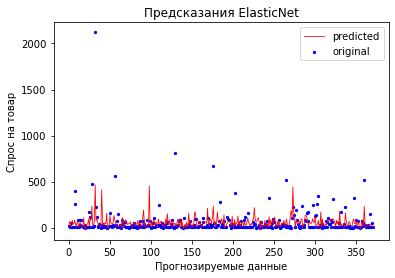

In [49]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.xlabel('Прогнозируемые данные')
plt.ylabel('Спрос на товар')
plt.title('Предсказания ElasticNet')
plt.legend()
plt.savefig('EN.pdf')

In [43]:
cv = cross_val_score(elastic,data.drop(columns=[0]), data[0], cv=5, scoring='neg_mean_absolute_error')

In [44]:
print(np.mean(cv))

-62.89462030840264


Mean Absolute Error: 46.93143396685306
Mean Squared Error: 25119.876599889165
Mean absolute per error  0.04527539382947399


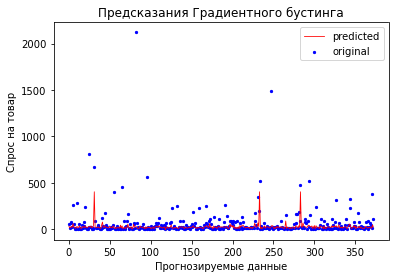

In [7]:
model = GradientBoostingRegressor(loss='lad', random_state=24)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean absolute per error ', metrics.r2_score(y_test, y_pred))
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.xlabel('Прогнозируемые данные')
plt.ylabel('Спрос на товар')
plt.title('Предсказания Градиентного бустинга')
plt.savefig('gd_boost.pdf')
plt.show()

In [8]:
cv = cross_val_score(model, data.drop(columns=[0]), data[0], cv=5, scoring='neg_mean_absolute_error')

In [9]:
print(np.mean(cv))

-47.357480846078545


Mean Absolute Error: 50.89056451612903
Mean Squared Error: 39337.712000806445
Mean absolute per error  -0.9179034107680861


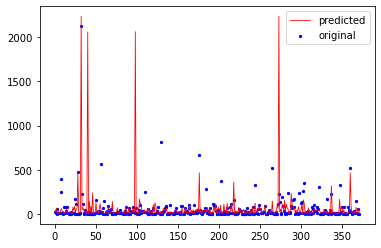

In [18]:
rf = RandomForestRegressor(random_state=22)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean absolute per error ', metrics.r2_score(y_test, y_pred))

x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.savefig('forest.pdf')
plt.show()

In [19]:
cv = cross_val_score(rf, data.drop(columns=[0]), data[0], cv=5, scoring='neg_mean_absolute_error')

In [20]:
print(np.mean(cv))

-50.93070967741936


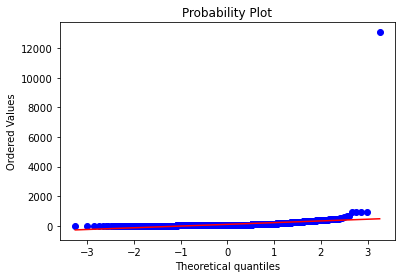

In [4]:
stats.probplot(data[518], dist="norm", plot=pylab)
pylab.show()

In [20]:
data[data[1] == np.max(data[1])]

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,512,513,514,515,516,517,518
719,468.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
data = data.drop(781)

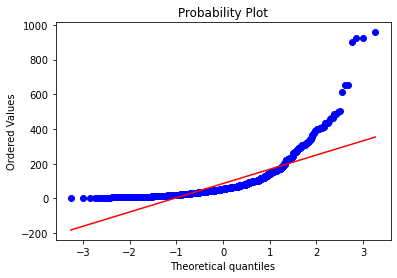

In [26]:
stats.probplot(data[518], dist="norm", plot=pylab)
pylab.show()


In [15]:
mm = MinMaxScaler()
data[518] = mm.fit_transform(np.log(data[518])[:, np.newaxis])

d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input contains infinity or a value too large for dtype('float64').

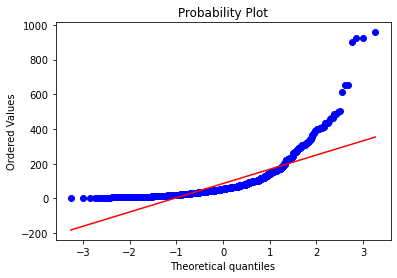

In [60]:
stats.probplot(data[518],plot=pylab)
plt.savefig('new_518.pdf')

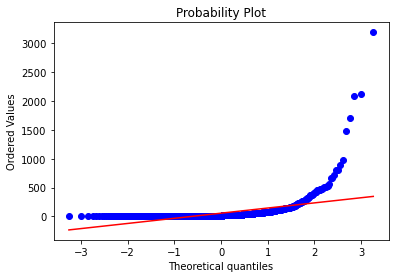

In [61]:
stats.probplot(data[0], plot=pylab)
pylab.show()

In [67]:
a =  stats.pearsonr(data[518], data[0])

No handles with labels found to put in legend.


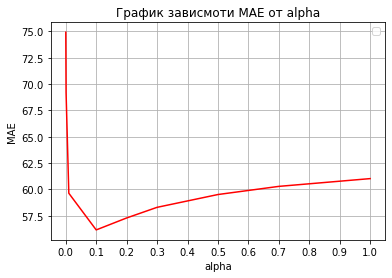

In [27]:
plt.plot(alphas, mae_, color='red')
plt.xticks(np.linspace(0,1,11))
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.title('График зависмоти MAE от alpha')
plt.legend()
plt.grid()
plt.savefig("lines_1.pdf")
